# Project: Prediction of the Electricity Consumption by County in California

In [1]:
# Import the libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
%matplotlib inline

In [2]:
# Import the dataset
data = pd.read_csv('ElectricityByTop10CountyCA(nonresidential).csv')
data

,County,Sector,2018,2017,Total Usage
0,ALAMEDA,Non-Residential,7367.119929,8108.827570,15475.947499
1,CONTRA COSTA,Non-Residential,6470.015417,6842.799382,13312.814799
2,FRESNO,Non-Residential,4838.604040,4641.642674,9480.246714
3,LOS ANGELES,Non-Residential,47267.108138,48089.687858,95356.795996
4,ORANGE,Non-Residential,13044.070989,13303.152020,26347.223009
5,RIVERSIDE,Non-Residential,8275.205307,8309.270050,16584.475357
6,SACRAMENTO,Non-Residential,6170.980299,6278.966669,12449.946968
7,SAN BERNARDINO,Non-Residential,10078.138838,10063.191150,20141.329988
8,SAN DIEGO,Non-Residential,12807.004508,12733.398624,25540.403132
9,SANTA CLARA,Non-Residential,12778.359518,13232.183222,26010.542740


In [3]:
# Dataset info
data.shape

(10, 5)

In [4]:
# Check whether there are any missing values
data.isnull().sum()

County         0
Sector         0
2018           0
2017           0
Total Usage    0
dtype: int64

In [5]:
data.describe()

,2018,2017,Total Usage
count,10.000000,10.000000,10.000000
mean,12909.660698,13160.311922,26069.972620
std,12439.704759,12643.588575,25081.756866
min,4838.604040,4641.642674,9480.246714
25%,6694.291545,7159.306429,13853.597974
50%,9176.672072,9186.230600,18362.902673
75%,12799.843261,13107.487073,25893.007838
max,47267.108138,48089.687858,95356.795996


In [6]:
from statistics import mean 
data['2018'].mean()

12909.660698299998

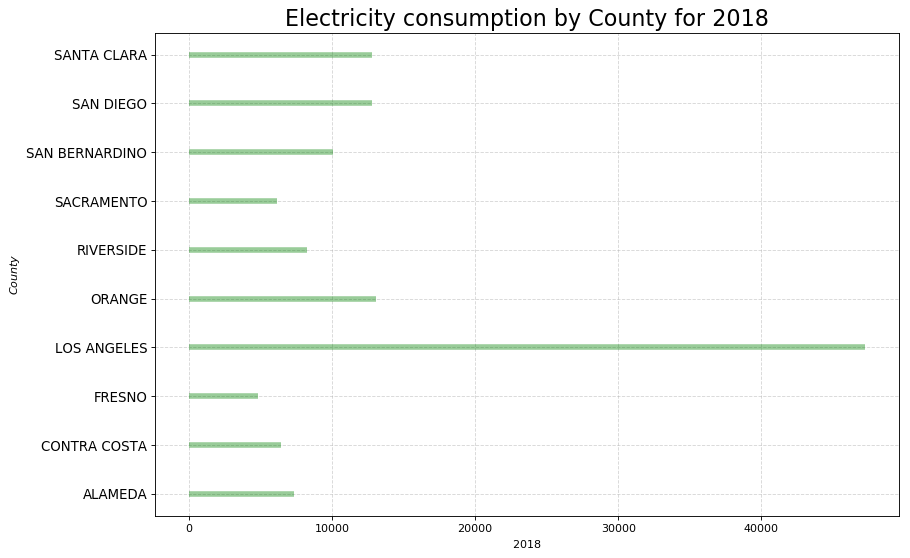

In [7]:
x = data.loc[:, ['2018']]
data['new'] = x
data['colors'] = ['green' for x in data['new']]
data.sort_values('new', inplace=True)


plt.figure(figsize=(12,8), dpi= 80)
plt.hlines(y=data.index, xmin=0, xmax=data.new, color=data.colors, alpha=0.4, linewidth=5)

plt.gca().set(ylabel='$County$', xlabel='$2018$')
plt.yticks(data.index, data.County, fontsize=12)
plt.title('Electricity consumption by County for 2018', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

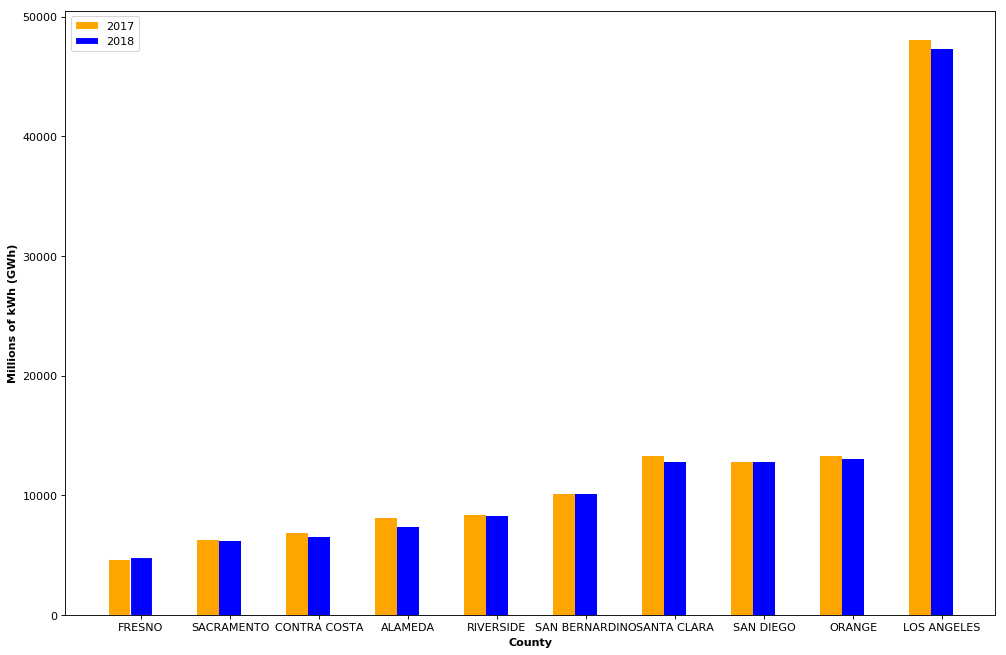

In [8]:
# Draw plot
plt.figure(figsize=(15,10), dpi= 80)

barWidth = 0.25
 
bars1 = data['2017']
bars2 = data['2018']


r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]


plt.bar(r1, bars1, color='orange', width=barWidth, edgecolor='white', label='2017')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='2018')


plt.xlabel('County', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], data.County)
plt.ylabel('Millions of kWh (GWh)', fontweight='bold')

plt.legend()
plt.show()

In [9]:
#Test Train Split Data
from sklearn.model_selection import train_test_split 
X = data['2017'].values.reshape(-1,1)
y = data['2018'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
#Implement a Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
y_pred = model.predict(X_test)
prediction = pd.DataFrame({'Factual': y_test.flatten(), 'Prediction': y_pred.flatten()})
prediction

,Factual,Prediction
0,6470.015417,6732.646956
1,13044.070989,13079.838705


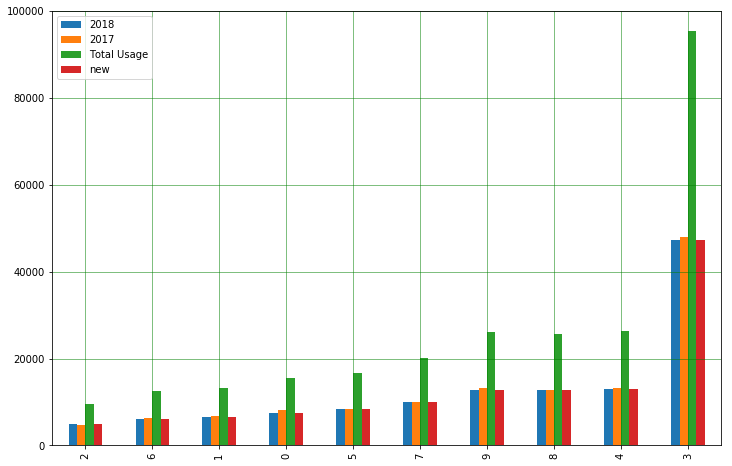

In [12]:
model = data
model.plot(kind='bar',figsize=(12,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [13]:
from sklearn import linear_model
X = data['2017'].values.reshape(-1,1)
y = data['2018'].values.reshape(-1,1)
y = y.astype('int') 
clf = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
clf.fit(X, y)

C:\Users\Ruslan\Anaconda3 5.0.1\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=0.001, verbose=0, warm_start=False)

In [14]:
print(clf.predict(y_pred))

[12807 12807]
